# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type

# Create the Urban, Suburban and Rural city DataFrames.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

# Get the number of rides for urban cities.
#urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
#suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
#rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
#urban_ride_count.head(),suburban_ride_count.head(),rural_ride_count.head()

# the above did not answer the question

# doing it again

# calculate total rides per city type
rural_rides_total = rural_cities_df.count()["ride_id"]
suburban_rides_total = suburban_cities_df.count()["ride_id"]
urban_rides_total = urban_cities_df.count()["ride_id"]
rural_rides_total, suburban_rides_total, urban_rides_total

(125, 625, 1625)

In [4]:
# 2. Get the total drivers for each city type
#urban_driver_sum = urban_cities_df.groupby(["city"]).sum()["driver_count"]
#suburban_driver_sum = suburban_cities_df.groupby(["city"]).sum()["driver_count"]
#rural_driver_sum = rural_cities_df.groupby(["city"]).sum()["driver_count"]
#urban_driver_sum.head(), suburban_driver_sum.head(),rural_driver_sum.head()

# the above did not answer the question

# doing it again
# calculate total drivers per city type
rural_drivers_total = city_data_df[city_data_df["type"] == "Rural"].sum()["driver_count"]
suburban_drivers_total = city_data_df[city_data_df["type"] == "Suburban"].sum()["driver_count"]
urban_drivers_total = city_data_df[city_data_df["type"] == "Urban"].sum()["driver_count"]
rural_drivers_total, urban_drivers_total, suburban_drivers_total

(78, 2405, 490)

In [5]:
#  3. Get the total amount of fares for each city type
#urban_fare_sum = urban_cities_df.groupby(["city"]).sum()["fare"]
#suburban_fare_sum = suburban_cities_df.groupby(["city"]).sum()["fare"]
#rural_fare_sum = rural_cities_df.groupby(["city"]).sum()["fare"]
#urban_fare_sum.head(), suburban_fare_sum.head(),rural_fare_sum.head()

# the above was the wrong answer

# re-working to get the correct answer:

# calculate total fares

rural_fares_total = rural_cities_df["fare"].sum()
suburban_fares_total = suburban_cities_df["fare"].sum()
urban_fares_total = urban_cities_df["fare"].sum()

rural_fares_total, suburban_fares_total, urban_fares_total



(4327.929999999999, 19356.33, 39854.380000000005)

In [6]:
#  4. Get the average fare per ride for each city type. 
#urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
#suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
#rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

# the above solution was wrong.

# the below is the correct calculation

urban_avg_fare_alt = urban_fares_total / urban_rides_total
suburban_avg_fare_alt = suburban_fares_total / suburban_rides_total
rural_avg_fare_alt = rural_fares_total / rural_rides_total

urban_avg_fare_alt, suburban_avg_fare_alt, rural_avg_fare_alt

(24.52577230769231, 30.970128000000003, 34.623439999999995)

In [7]:
# 5. Get the average fare per driver for each city type. 
urban_avg_fare_per_driver = urban_fares_total / urban_drivers_total
suburban_avg_fare_per_driver = suburban_fares_total / suburban_drivers_total
rural_avg_fare_per_driver = rural_fares_total / rural_drivers_total

urban_avg_fare_per_driver, suburban_avg_fare_per_driver, rural_avg_fare_per_driver

(16.571467775467777, 39.50271428571429, 55.486282051282046)

In [8]:
#  6. Create a PyBer summary DataFrame. 




#pyber_data_df["fare"].sum()
#

# list of name, degree, score
city_types = ["Rural", "Suburban", "Urban"]
t_r = [rural_rides_total, suburban_rides_total, urban_rides_total]
t_d = [rural_drivers_total, suburban_drivers_total, urban_drivers_total]
t_f = [rural_fares_total, suburban_fares_total, urban_fares_total]
a_f_p_r = [rural_avg_fare_alt, suburban_avg_fare_alt, urban_avg_fare_alt]
a_f_p_d = [rural_avg_fare_per_driver, suburban_avg_fare_per_driver, urban_avg_fare_per_driver]

# dictionary of lists 
dict = {"type": city_types, "Total Rides": t_r, "Total Drivers": t_d, "Total Fares" : t_f , "Average Fare per Ride" : a_f_p_r, "Average Fare per Driver" : a_f_p_d} 
    
pyber_summary_df = pd.DataFrame(dict)

#suburban_drivers_total

#city_types = ["Rural", "Suburban", "Urban"]

#pyber_summary_df = pd.DataFrame([{
#        "type": city_types,
#       "Total Rides" : pyber_data_df.groupby(["type"]).count()["ride_id"],
#        "Total Drivers" : city_data_df.groupby(["type"]).sum()["driver_count"],
#        "Total Fares" : pyber_data_df.groupby(["type"]).sum()["fare"],
#        "Average Fare per Ride" : pyber_data_df.groupby(["type"]).mean()["fare"],
#        "Average Fare per Driver": pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df.groupby(["type"]).sum()["driver_count"]
#}])

pyber_summary_df.set_index("type", inplace = True)

         #"Total Students": new_student_count, # changed from student_count to new_student_count
          #"Total Budget": total_budget,
          #"Average Math Score": average_math_score, 
          #"Average Reading Score": average_reading_score,
          #"% Passing Math": passing_math_percentage,
         #"% Passing Reading": passing_reading_percentage,
        #"% Overall Passing": overall_passing_percentage}])
pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [10]:
#  8. Format the columns.
# Format the "Total rides" to have the comma for a thousands separator.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
# Format the "Total Drivers" to have the comma for a thousands separator.
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)
# Format the "Total Budget" to have the comma for a thousands separator, a decimal separator and a "$".
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)
pyber_summary_df.head()




,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 1. Read the merged DataFrame
#new_df = pyber_data_df.groupby("date")

#dates_df = pyber_data_df.groupby(["date"])

#types_df = pyber_data_df.groupby(["type"])

#dates_df.head()
#types_df.head(20)

pyber_data_df.head(10)

#new_df = pd.DataFrame(dates_df, columns = [types_df])


#new_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [12]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

#pyber_data_df.groupby("date").sum()["fare"]
#pyber_data_df.groupby("type").sum()["fare"]

#new_df = pyber_data_df.groupby('date', as_index = True)['type'].sum()["fare"]


new_df = pd.DataFrame(pyber_data_df.groupby(["type", "date"]).sum()[["fare"]])
new_df

fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33
...                          ...
Urban 2019-05-08 04:20:00  21.99
      2019-05-08 04:39:49  18.45
      2019-05-08 07:29:01  18.55
      2019-05-08 11:38:35  19.77
      2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

In [13]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
new_df = new_df.reset_index()
new_df


,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [14]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
date_type_sum_pivot = new_df.pivot(index="date", columns="type", values="fare")
date_type_sum_pivot.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [15]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

# retrieving rows by loc method
rows = date_type_sum_pivot.loc["2019-01-01":"2019-04-29"]
rows
  

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [16]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
date_type_sum_pivot.index = pd.to_datetime(date_type_sum_pivot.index)
date_type_sum_pivot.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [17]:
# 7. Check that the datatype for the index is datetime using df.info()
date_type_sum_pivot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-01 00:08:16 to 2019-05-08 13:10:18
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  625 non-null    float64
 2   Urban     1625 non-null   float64
dtypes: float64(3)
memory usage: 74.2 KB


In [36]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.

#resampled_df = pd.DataFrame(new_df.fare.resample('W').sum())
#resampled_df
#new_df.fare.resample('W').sum()

weekly_summary = pd.DataFrame()
weekly_summary['Rural'] = date_type_sum_pivot.Rural.resample('W').sum()
weekly_summary['Suburban'] = date_type_sum_pivot.Suburban.resample('W').sum()
weekly_summary['Urban'] = date_type_sum_pivot.Urban.resample('W').sum()
weekly_summary.head(10)

,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


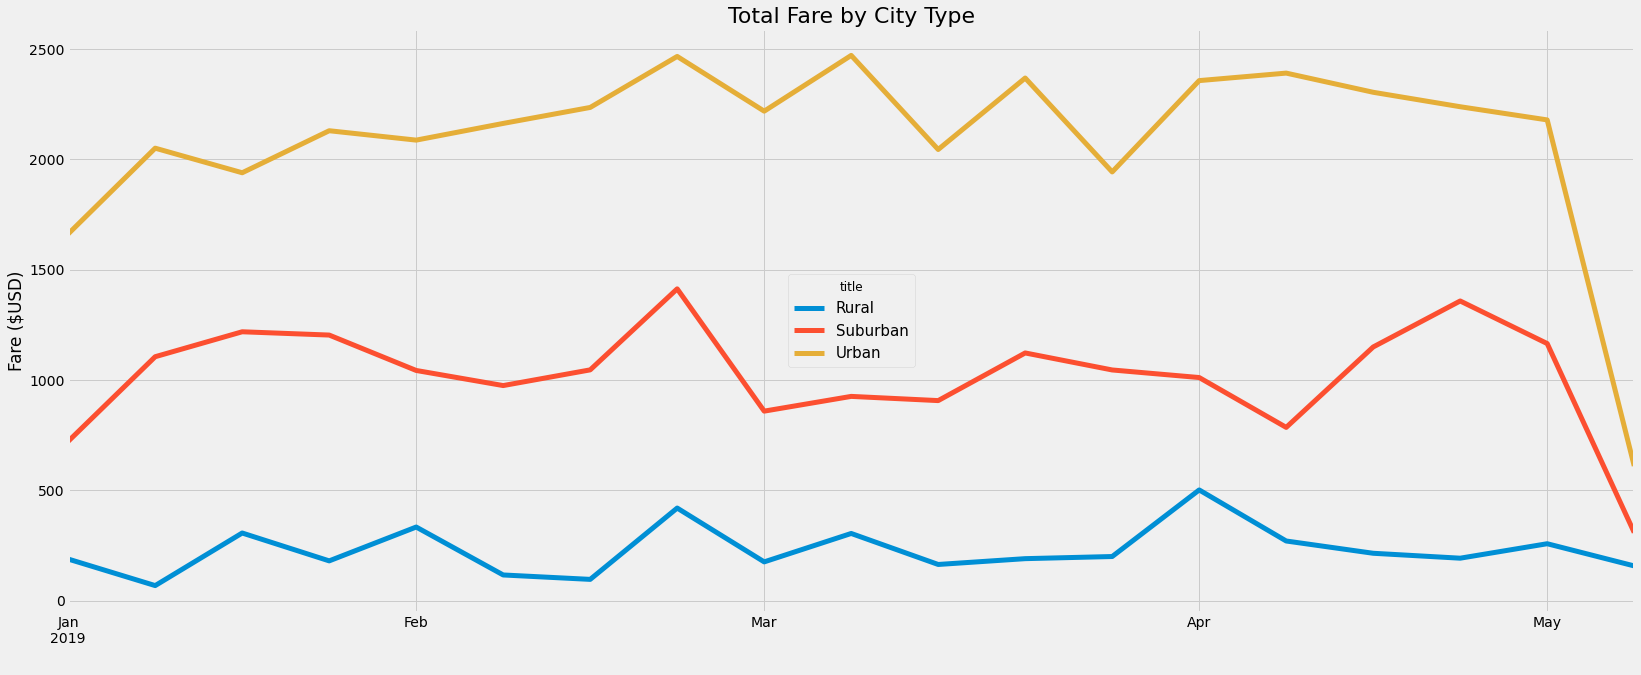

In [44]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

#ax.scatter(x_axis, y_axis, s=[i*5 for i in x_axis], color = "skyblue", label = 'Boston', edgecolor = "black")


#fig,weekly_summary = plt.subplots()

#date_type_sum_pivot.set_ylabel("Fare ($USD)")
#weekly_summary.set_xlabel("Fare($)")
#weekly_summary.set_xlim(0, 50)
#weekly_summary.legend()
#weekly_summary.plot(label = "Boston")

#fig,ax = plt.subplots()

#for name in ['Rural','Suburban','Urban']:
 #   ax.plot(weekly_summary[weekly_summary.name==name].date,weekly_summary[weekly_summary.name==name].value(),label=name)

#plt.xlim(pd.Timestamp('2019-01-06'), pd.Timestamp('2019-04-21'))    
weekly_summary.plot(figsize=(25, 10), linewidth=5)
#plt.xlabel("Date", labelpad=15)
plt.ylabel("Fare ($USD)")
plt.xlabel(" ")
plt.title("Total Fare by City Type", fontsize=22);



# Create a legend
lgnd = plt.legend(fontsize="15", mode="Expanded",
         scatterpoints=1, loc="center", title="title")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)


plt.savefig("Analysis/PyBer_fare_summary.png")


#weekly_summary.plot()

#ax.set_xlabel("year")
#ax.set_ylabel("Fare ($USD)")
#ax.legend()

